### Topic: Challenge Set 5
### Subject: Linear Splitting
### Date: 10/15/2018
### Name: Maddy O'Brien Jones
### Worked: alone

# Challenge 1
Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split

sns.set()
df = pd.read_csv('2013_movies.csv')

/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


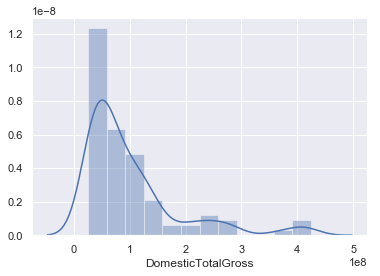

In [2]:
sns.distplot(df['DomesticTotalGross'])

In [3]:
df['constant']=1

In [4]:
df = df.dropna(axis=0)

In [5]:
features = pd.DataFrame(df['constant'])
target = pd.DataFrame(df['DomesticTotalGross'])

scaler = StandardScaler()
features = scaler.fit_transform(features)

In [6]:
features.shape

(87, 1)

In [7]:
m = LinearRegression()
m.fit(features,target)
m.score(features,target)

0.0

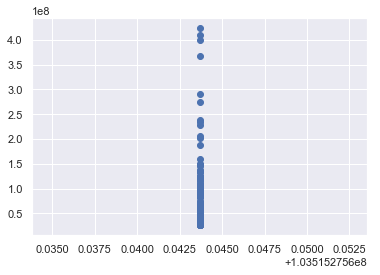

In [8]:
plt.scatter(m.predict(features),target)

In [9]:
res = m.predict(features)-target

(array([ 3.,  1.,  0.,  2.,  3.,  3.,  3., 14., 21., 37.]),
 array([-3.21152771e+08, -2.81242792e+08, -2.41332812e+08, -2.01422833e+08,
        -1.61512853e+08, -1.21602873e+08, -8.16928938e+07, -4.17829142e+07,
        -1.87293456e+06,  3.80370450e+07,  7.79470246e+07]),
 <a list of 10 Patch objects>)

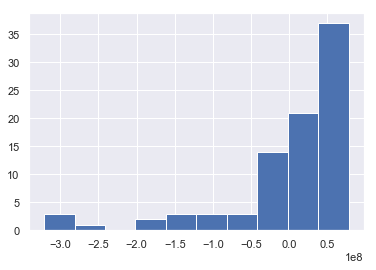

In [10]:
plt.hist(res['DomesticTotalGross'])

The residuals are not normally distributed, indicating that we are (unsurprisingly) missing an aspect of the model that could help explain the relationship. The residuals make sense as it looks like a reversed version of the distribution plot of Domestic Total Gross.

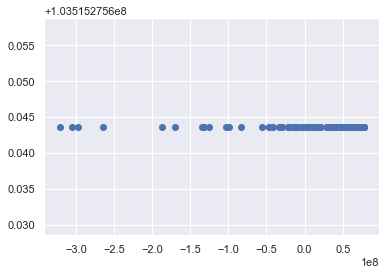

In [11]:
plt.scatter(res, m.predict(features))

# Challenge 2
Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?

In [12]:
features = df[['constant', 'Budget']]
scaler = StandardScaler()
features = scaler.fit_transform(features)

In [13]:
m = LinearRegression()
m.fit(features,target)
m.score(features,target)

0.2823003769295487

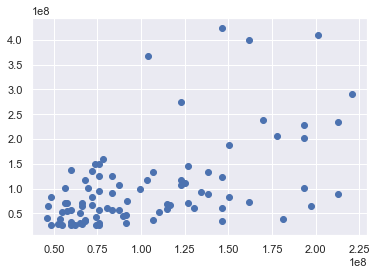

In [14]:
plt.scatter(m.predict(features),target)

This plot, while still messy, indicates a stronger model because the distribution of points is slightly more linear.

(array([ 3.,  1.,  0.,  1.,  6., 11., 26., 28.,  7.,  4.]),
 array([-2.78440271e+08, -2.36285967e+08, -1.94131662e+08, -1.51977357e+08,
        -1.09823052e+08, -6.76687478e+07, -2.55144431e+07,  1.66398616e+07,
         5.87941663e+07,  1.00948471e+08,  1.43102776e+08]),
 <a list of 10 Patch objects>)

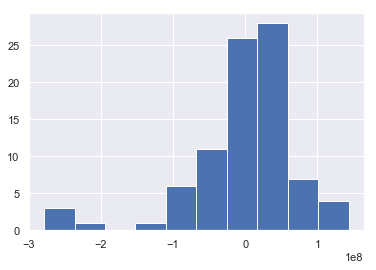

In [15]:
res = m.predict(features)-target
plt.hist(res['DomesticTotalGross'])

The residuals are bimodal in this distribution, but are looking much more normal than when there was only a constant as a predictor. However, the distribution of Domestic Total Gross is also slightly bimodal, so this could mean that we are on the right track.

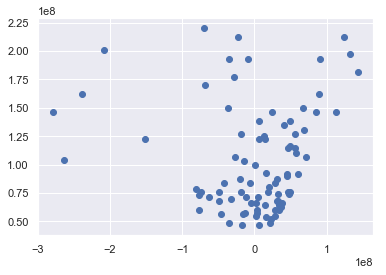

In [16]:
plt.scatter(res, m.predict(features))

# Challenge 3
Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). How can you interpret what's happening in the model?

In [17]:
rating = pd.get_dummies(df['Rating'])
df = pd.concat([df, rating], axis=1)

In [18]:
features = df[['constant', 'Budget','PG','PG-13','R']]
scaler = StandardScaler()
features = scaler.fit_transform(features)

In [19]:
m = LinearRegression()
m.fit(features,target)
m.score(features,target)

0.2869010840454118

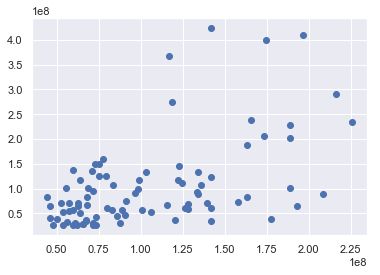

In [20]:
plt.scatter(m.predict(features),target)

There isn't really a clear difference between the scatter plot with dummy variables in the model and the scatter plot without dummy variables.

(array([ 2.,  2.,  0.,  1.,  6., 10., 24., 28., 10.,  4.]),
 array([-2.82567295e+08, -2.40424052e+08, -1.98280808e+08, -1.56137565e+08,
        -1.13994321e+08, -7.18510777e+07, -2.97078343e+07,  1.24354092e+07,
         5.45786526e+07,  9.67218961e+07,  1.38865140e+08]),
 <a list of 10 Patch objects>)

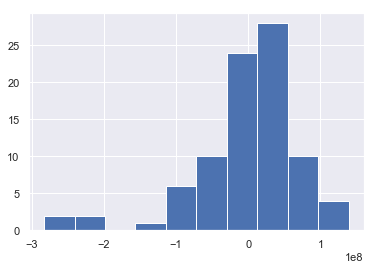

In [21]:
res = m.predict(features)-target
plt.hist(res['DomesticTotalGross'])

This model appears to be only slightly better than the previous one. The histogram of residuals is becoming slightly more normal, but is still bimodal.

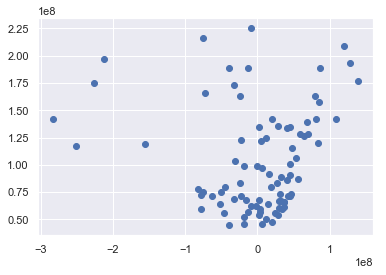

In [22]:
plt.scatter(res, m.predict(features))

# Challenge 4
Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.

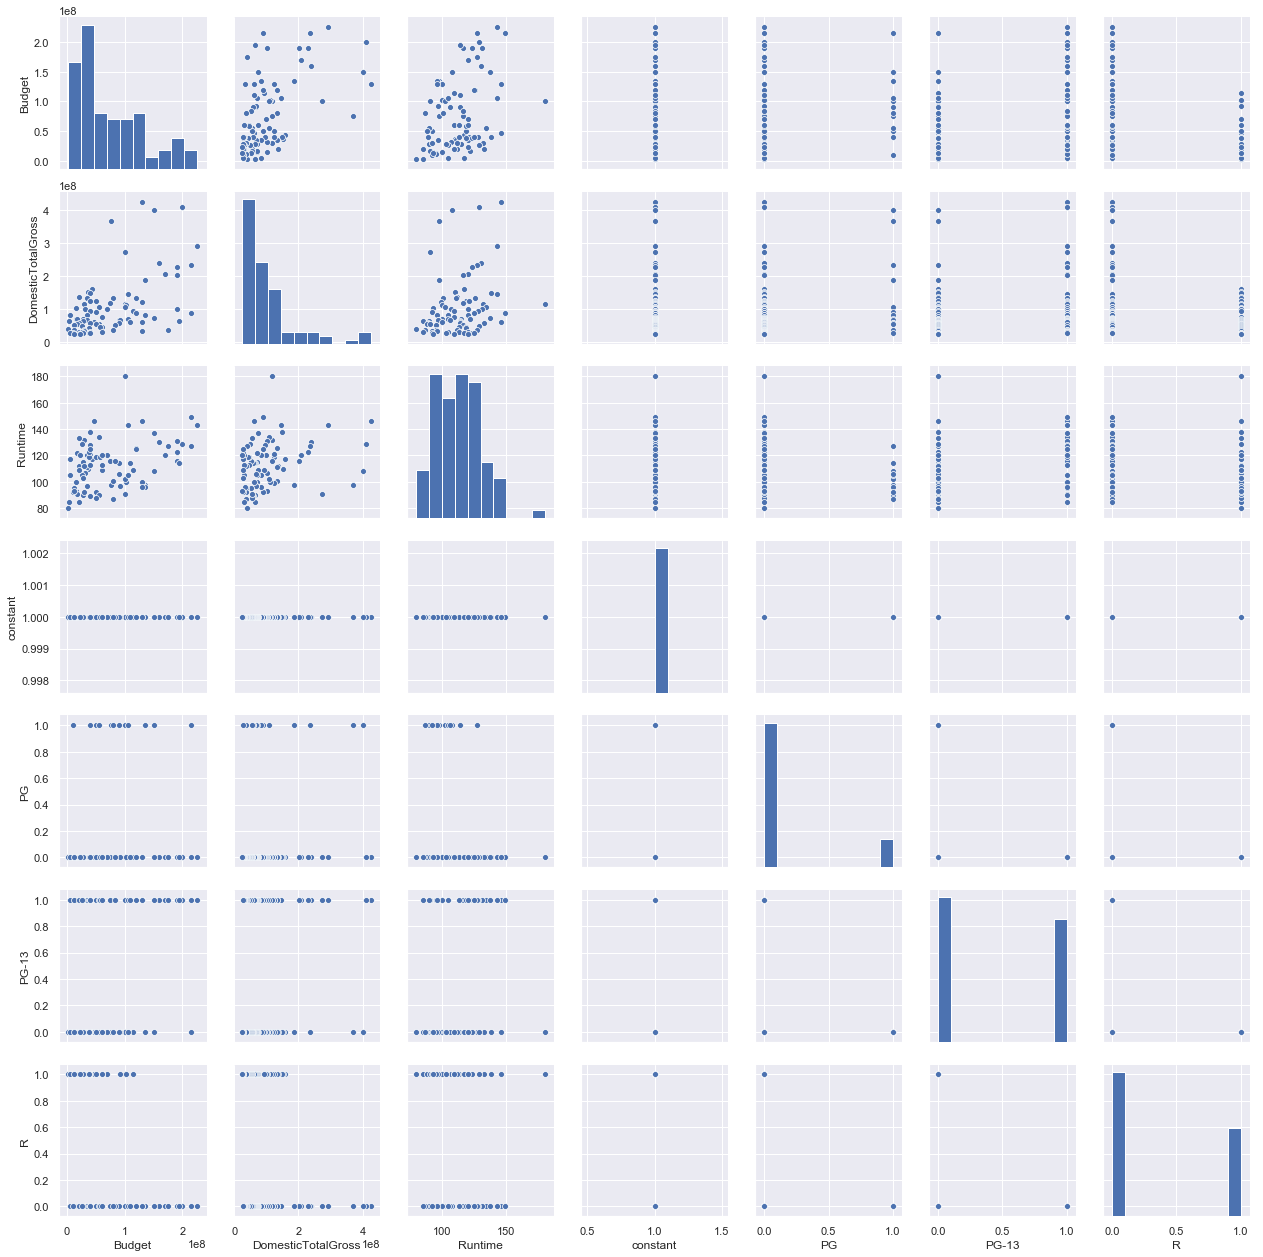

In [23]:
sns.pairplot(df)

In [24]:
df.columns

Index(['Title', 'Budget', 'DomesticTotalGross', 'Director', 'Rating',
       'Runtime', 'ReleaseDate', 'constant', 'PG', 'PG-13', 'R'],
      dtype='object')

In [25]:
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'])
df['Year']=df['ReleaseDate'].dt.year

In [26]:
features = df[['Budget','Runtime','Year','PG','PG-13','R']]
scaler = StandardScaler()
features = scaler.fit_transform(features)

In [27]:
m = LinearRegression()
m.fit(features,target)
m.score(features,target)

0.298677054432667

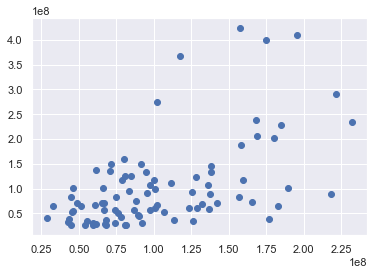

In [28]:
plt.scatter(m.predict(features),target)

(array([ 2.,  2.,  1.,  0.,  5., 13., 24., 26., 11.,  3.]),
 array([-2.67301823e+08, -2.26729046e+08, -1.86156270e+08, -1.45583493e+08,
        -1.05010716e+08, -6.44379385e+07, -2.38651616e+07,  1.67076154e+07,
         5.72803924e+07,  9.78531694e+07,  1.38425946e+08]),
 <a list of 10 Patch objects>)

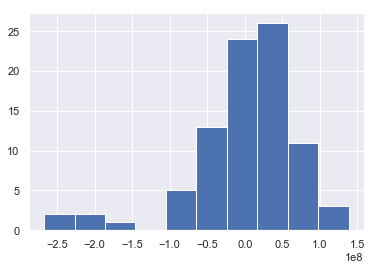

In [29]:
res = m.predict(features)-target
plt.hist(res['DomesticTotalGross'])

In [30]:
poly2 = PolynomialFeatures(2)

lmpoly2 = LinearRegression()
lmpoly2.fit(poly2.fit_transform(features),target)
lmpoly2.score(poly2.transform(features),target)

0.3177166256903464

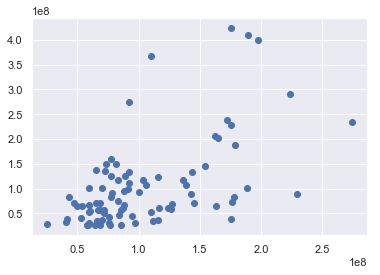

In [31]:
plt.scatter(lmpoly2.predict(poly2.transform(features)),target)

(array([ 3.,  2.,  0.,  0.,  7., 12., 28., 23.,  9.,  3.]),
 array([-2.57926993e+08, -2.18136019e+08, -1.78345045e+08, -1.38554070e+08,
        -9.87630962e+07, -5.89721220e+07, -1.91811478e+07,  2.06098264e+07,
         6.04008006e+07,  1.00191775e+08,  1.39982749e+08]),
 <a list of 10 Patch objects>)

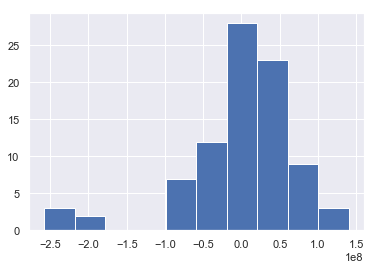

In [32]:
res = lmpoly2.predict(poly2.transform(features))-target
plt.hist(res['DomesticTotalGross'])

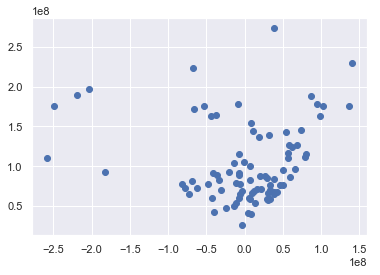

In [33]:
plt.scatter(res,lmpoly2.predict(poly2.transform(features)))

In [34]:
poly3 = PolynomialFeatures(3)

lmpoly3 = LinearRegression()
lmpoly3.fit(poly3.fit_transform(features),target)
lmpoly3.score(poly3.transform(features),target)

-0.19236551878879227

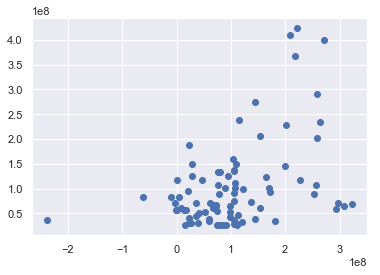

In [35]:
plt.scatter(lmpoly3.predict(poly3.transform(features)),target)

(array([ 1.,  2.,  8.,  6., 21., 22., 18.,  3.,  2.,  4.]),
 array([-2.73578585e+08, -2.20832970e+08, -1.68087355e+08, -1.15341740e+08,
        -6.25961246e+07, -9.85050950e+06,  4.28951056e+07,  9.56407207e+07,
         1.48386336e+08,  2.01131951e+08,  2.53877566e+08]),
 <a list of 10 Patch objects>)

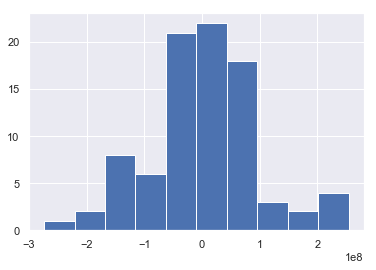

In [36]:
res = lmpoly3.predict(poly3.transform(features))-target
plt.hist(res['DomesticTotalGross'])

The polynomial distributions seem to help make the residuals more normal. The 2nd degree polynomial regression seems to be the best linear model for this dataset, even though the R2 is still only .31. The 3rd degree polynomial model has a close to normal distribution of residuals, but the R2 is negative.

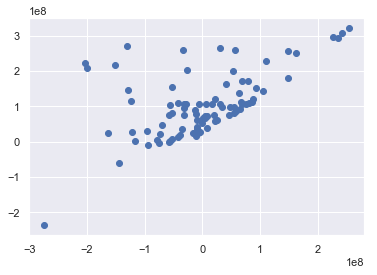

In [37]:
plt.scatter(res, lmpoly3.predict(poly3.transform(features)))

# Challenge 5
Fitting and checking predictions on the exact same data set can be misleading. Divide your data into two sets: a training and a test set (roughly 75% training, 25% test is a fine split). Fit a model on the training set, check the predictions (by plotting versus actual values) in the test set.

In [38]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

In [39]:
poly2 = PolynomialFeatures(2)

lmpoly2 = LinearRegression()
lmpoly2.fit(poly2.fit_transform(X_train),y_train)
lmpoly2.score(poly2.transform(X_train),y_train)

0.2640905546040676

In [40]:
lmpoly2.score(poly2.transform(X_test),y_test)

0.33524659277811186

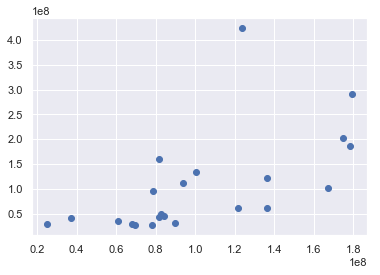

In [41]:
plt.scatter(lmpoly2.predict(poly2.transform(X_test)),y_test)

([array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
  array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
  array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([0., 0., 0., 0., 0., 0.

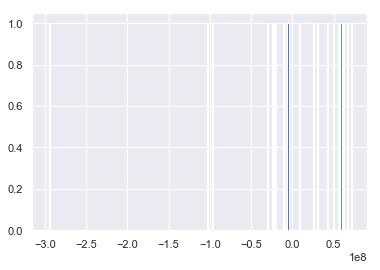

In [42]:
res = lmpoly2.predict(poly2.transform(X_test)) - y_test
plt.hist(res)

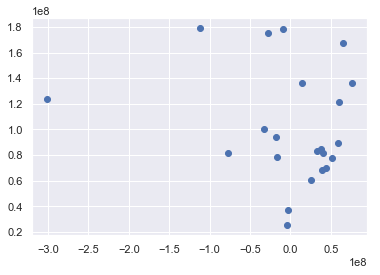

In [43]:
plt.scatter(res, lmpoly2.predict(poly2.transform(X_test)))

#### (Just to see what happens)

In [44]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

rf = RandomForestRegressor(n_estimators=100, max_features=3)
rf.fit(X_train, y_train)
rf.score(X_train, y_train)

/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.8303424599939153

In [45]:
rf.score(X_test,y_test)

0.20996359010262233

In [46]:
gbm = GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=.2, random_state=42)
gbm.fit(X_train, y_train)
gbm.score(X_train, y_train)

/Users/madisonobrienjones/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9967924747446705

In [47]:
gbm.score(X_test,y_test)

0.0846965051552736

It looks like GBM and Random Forests aren't much better at predicting, and seem to be overfitting the train data by quite a lot.